
    Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)
    Построить случайный лес, вывести важность признаков
    Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
    В качестве решения: Jupyter notebook с кодом, комментариями и графиками



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [2]:
data = pd.read_csv('train(1).csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [5]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[categorials] = data[categorials].fillna('nan')

In [6]:
#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [7]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [8]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Exterior2nd_Stone,RoofMatl_WdShngl,Neighborhood_SawyerW,BsmtQual_Ex,LotShape_Reg,Condition1_Artery,PavedDrive_Y,BsmtFinType2_Unf,SaleType_ConLw,MiscFeature_Othr
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,0,0,0,0,1,0,1,1,0,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,0,0,1,0,1,1,0,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,0,1,0,1,1,0,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,0,1,0,0,1,1,0,0
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,0,1,0,1,0


In [9]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

0.976995731403544

In [11]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

#Модель получилась не много переобученной

0.8970305367895945

In [12]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [13]:
imp.index = pd.Series(X_train.columns)

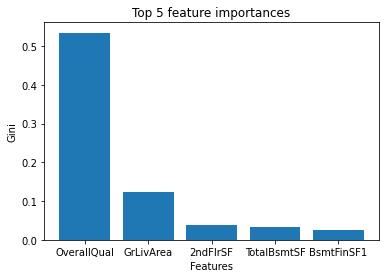

In [14]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

In [15]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [16]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [17]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [18]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.9400127508384996
Score on test data 0.8563916620491707
Score on train data with model LinearRegression 0.922108540356243
Score on test data with model LinearRegression 0.8533836050579287
Score on train data with model KNeighborsRegressor 0.7419951520813983
Score on test data with model KNeighborsRegressor 0.6775304068635524
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7347908597192776


Лучше всех справилась Линейная регрессия. Деревья решений, как и предполагалось, переобучилась. Алгоритм ближайшего соседа тоже не плохо справилась с задачей. 

In [19]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

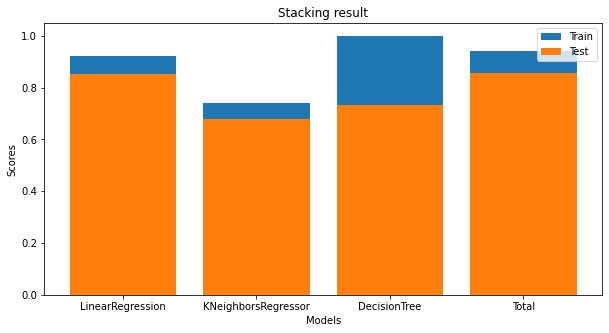

In [20]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

In [23]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [24]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('Lasso', Lasso()),
        ('RandomForestRegressor', RandomForestRegressor()),
        ('xgb.XGBRegressor', xgb.XGBRegressor())
    ], RidgeCV())

In [25]:
Regressor.fit(X_train, y_train)

C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244446182647.76984, tolerance: 615098412.8205526
  model = cd_fast.enet_coordinate_descent(
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197645859647.72263, tolerance: 474197795.0469258
  model = cd_fast.enet_coordinate_descent(
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115643927161.75208, tolerance: 483985512.6952248
  model = cd_fast.enet_coordinate_descent(
C:\Users\CoreI7\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

StackingRegressor(estimators=[('Lasso', Lasso()),
                              ('RandomForestRegressor',
                               RandomForestRegressor()),
                              ('xgb.XGBRegressor',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_de...step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
      

In [26]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.9689351780098632
Score on test data 0.8996758677034031
Score on train data with model Lasso 0.9219795046624747
Score on test data with model Lasso 0.8558731924215635
Score on train data with model RandomForestRegressor 0.9762326589787079
Score on test data with model RandomForestRegressor 0.8930515767755425
Score on train data with model xgb.XGBRegressor 0.9997776492147783
Score on test data with model xgb.XGBRegressor 0.8962101902453257


Все алгоритмы справились с задачей хорошо

In [27]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

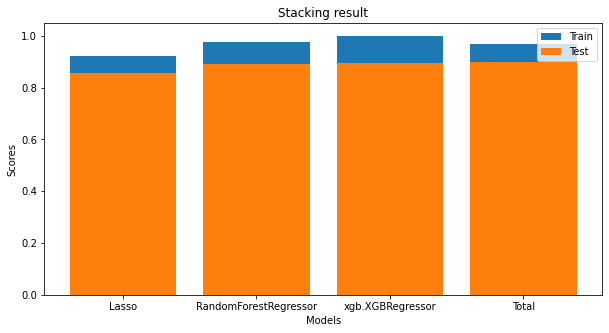

In [28]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()